# Numpy and Matplotlib

[matplotlib](https://matplotlib.org/) is the most widely used scientific plotting library with Python.

[NumPy](https://numpy.org) is the fundamental package for scientific computing with Python.

This notebook introduces you to the parts of each we will need for this course. You can spend years studying either library, and still not be done. Luckily there are things like that [matplotlib gallery](https://matplotlib.org/gallery/index.html). If you need to make a new kind of plot, scan through it to find something similar and build on that.

In [1]:
# to display matplotlib figures inline in a notebook:
%matplotlib inline

In [2]:
# A convention in PyData land is to import pyplot as plt
import matplotlib.pyplot as plt

You can create simple plots like so:

Text(0,0.5,'Position (km)')

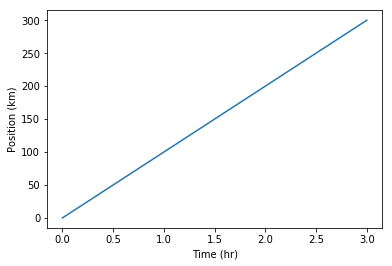

In [3]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

To import numpy:

In [4]:
import numpy as np
# another convention, numpy is abbreviated as np

In [5]:
# the foundation of numpy is the numpy array
time_array = np.array(time)

time_array

array([0, 1, 2, 3])

In [6]:
# arrays are smart:
time_array * 3

array([0, 3, 6, 9])

In [7]:
np.sum(time_array)

6

Arrays are n-d containers for numerical values. You can create 1D, 2D, 3D, etc arrays:

In [8]:
b = np.array([[1, 2, 3], [4, 5,6]])
b

array([[1, 2, 3],
       [4, 5, 6]])

Arrays know their size:

In [9]:
b.shape

(2, 3)

Why bother with arrays, we have lists!

In [10]:
L = range(1000)

In [11]:
%timeit [i**2 for i in L]

381 µs ± 9.25 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
a = np.arange(1000)

In [13]:
%timeit a**2

1.89 µs ± 58.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Operations like creating an evenly spaced sequence of numbers between `start` and `end` are so common there are builtin helpers for them:

In [14]:
np.linspace(0, 23)

array([  0.        ,   0.46938776,   0.93877551,   1.40816327,
         1.87755102,   2.34693878,   2.81632653,   3.28571429,
         3.75510204,   4.2244898 ,   4.69387755,   5.16326531,
         5.63265306,   6.10204082,   6.57142857,   7.04081633,
         7.51020408,   7.97959184,   8.44897959,   8.91836735,
         9.3877551 ,   9.85714286,  10.32653061,  10.79591837,
        11.26530612,  11.73469388,  12.20408163,  12.67346939,
        13.14285714,  13.6122449 ,  14.08163265,  14.55102041,
        15.02040816,  15.48979592,  15.95918367,  16.42857143,
        16.89795918,  17.36734694,  17.83673469,  18.30612245,
        18.7755102 ,  19.24489796,  19.71428571,  20.18367347,
        20.65306122,  21.12244898,  21.59183673,  22.06122449,
        22.53061224,  23.        ])

In [15]:
# you can control how many steps you want
np.linspace(0, 23, num=10)

array([  0.        ,   2.55555556,   5.11111111,   7.66666667,
        10.22222222,  12.77777778,  15.33333333,  17.88888889,
        20.44444444,  23.        ])

In [16]:
# if you need points spaced by a certain amount use `np.arange`
np.arange(0, 23, step=2.2)
# the below also works, if you need to save a few chars
#np.arange(23, step=2.2)

array([  0. ,   2.2,   4.4,   6.6,   8.8,  11. ,  13.2,  15.4,  17.6,
        19.8,  22. ])

Arrays are typed:

In [17]:
c = np.array([1, 2, 3])
c.dtype

dtype('int64')

In [18]:
d = np.array([1., 2., 3.])
d.dtype

dtype('float64')

A frequently done thing is to make a numpy array with lots of points in the range of your x axis and use it to plot functions:

In [19]:
x = np.linspace(0, 10)

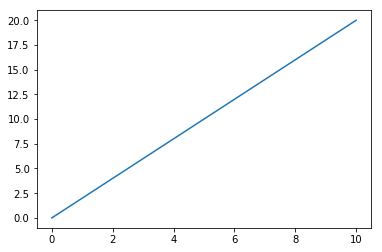

In [20]:
plt.plot(x, 2*x)

Because you numpy arrays are smart you can directly compute things with them, without needing a `for`-loop:

In [21]:
x_squared = x**2

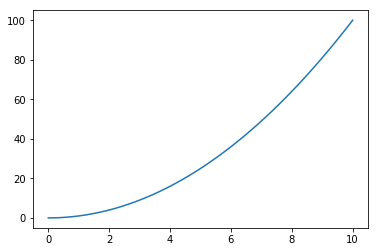

In [22]:
plt.plot(x, x_squared)

And we can plot several lines in one go:

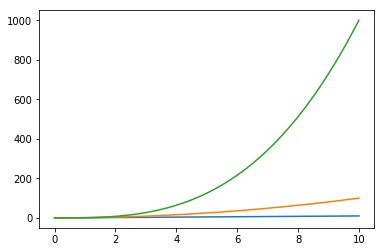

In [23]:
plt.plot(x, x,)
plt.plot(x, x_squared,)
plt.plot(x, x**3);

How do we get a legend?

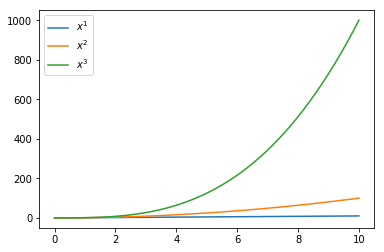

In [24]:
plt.plot(x, x, label='$x^1$')
plt.plot(x, x**2, label='$x^2$')
plt.plot(x, x**3, label='$x^3$')
plt.legend(loc='best');

Instead of connecting each point on the plot with a line we can draw a marker:

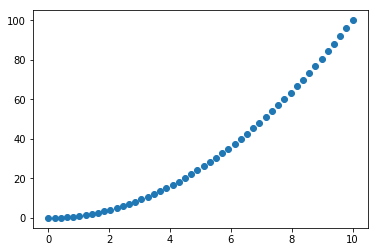

In [25]:
plt.plot(x, x**2, 'o')

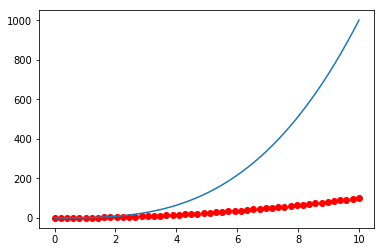

In [26]:
# as well as influence the colour
plt.plot(x, x**2, 'ro')
plt.plot(x, x**3);

## Exercise

Create a plot showing `cos(x)` and `sin(x)` for the range $-2\pi$ to $+2\pi$ in different colours on the same plot.

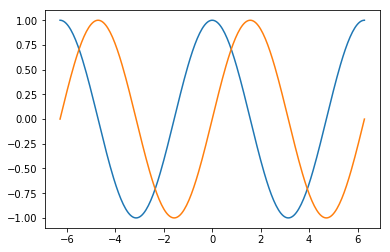

In [27]:
### BEGIN SOLUTION

X = np.linspace(-2*np.pi, 2*np.pi, 256)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C, label='cos(x)')
plt.plot(X, S, label='sin(x)')

### END SOLUTION

Sometimes you want to explicitly control the range of an axis:

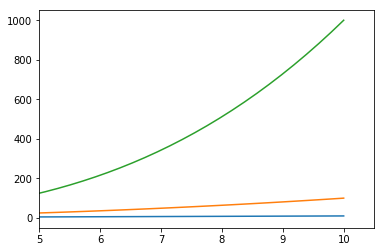

In [28]:
plt.plot(x, x)
plt.plot(x, x**2)
plt.plot(x, x**3)
# by setting the second argument to `None` we are saying
# for that limit please do your normal thing
plt.xlim([5, None]);

More examples: https://www.scipy-lectures.org/intro/matplotlib/index.html#matplotlib

make sure to check the matplotlib gallery!


## Back to numpy

Numpy lets you do numerical computations much much faster than in pure Python. This works because most of numpy is written in C or FORTRAN. To take advantage of this speed you need to think in expressions, not for loops. Part of this is learning a few patterns regarding indexing:

In [29]:
a = np.arange(4, 10)
a

array([4, 5, 6, 7, 8, 9])

In [30]:
a[2], a[0], a[3]

(6, 4, 7)

In [31]:
a[-1]

9

In [32]:
a[::-1]

array([9, 8, 7, 6, 5, 4])

In [33]:
a[:2]

array([4, 5])

In [34]:
a[:5:2]

array([4, 6, 8])

The fun really starts when you have a 2D array:

In [35]:
a = np.diag(np.arange(3))

In [36]:
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [37]:
a[1]

array([0, 1, 0])

In [38]:
a[1,1]

1

In [39]:
a[0, 1]

0

In [40]:
a[2, 1] = 10

In [41]:
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [42]:
a[:, 1]

array([ 0,  1, 10])

In [43]:
a[1, :]

array([0, 1, 0])

You can also combine clever indexing with assignment

In [44]:
a[1, :] = 12

In [45]:
a

array([[ 0,  0,  0],
       [12, 12, 12],
       [ 0, 10,  2]])

In [46]:
a[1, :] = a[:, 1] * 2

In [47]:
a

array([[ 0,  0,  0],
       [ 0, 24, 20],
       [ 0, 10,  2]])

In [48]:
a + a

array([[ 0,  0,  0],
       [ 0, 48, 40],
       [ 0, 20,  4]])

In [49]:
np.sum(a, axis=0)

array([ 0, 34, 22])

In [50]:
np.sum(a, axis=1)

array([ 0, 44, 12])

Basic linear algebra:

In [57]:
x = np.array([2., 3., 4.])

W = np.random.random(size=(10, 3))
b = np.random.random(size=(10))

In [58]:
W

array([[ 0.97295167,  0.4879139 ,  0.54895952],
       [ 0.68913871,  0.87300901,  0.15778859],
       [ 0.19847523,  0.90125113,  0.57729521],
       [ 0.60808102,  0.50923565,  0.54935185],
       [ 0.65103302,  0.1088079 ,  0.42094529],
       [ 0.8552262 ,  0.14765296,  0.76664681],
       [ 0.72520771,  0.58973   ,  0.59271532],
       [ 0.48415   ,  0.36372988,  0.17224551],
       [ 0.21923046,  0.79351043,  0.75805644],
       [ 0.6872792 ,  0.82274767,  0.33681036]])

We can multiply the matrix `W` with the vector `x`:

In [59]:
np.dot(W, x)

array([ 6.09173179,  4.83630064,  5.95874121,  5.87448699,  4.06611628,
        5.34391515,  6.58522234,  2.91075585,  6.70038925,  5.57457131])